In [100]:
# Import the required libraries and dependencies
import pandas as pd

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import json
import dataframe_utils

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

## Read in the csv and evaluate missing values

In [101]:
def prt_sep():
    print("")
    print("-----------------------------------------------------------------------------------------------")
    print("")


def df_characteristics(df):
    print("df.head")
    display(df.head())
    prt_sep()
    print("df.info")
    display(df.info())
    prt_sep()
    print("df.describe()")
    display(df.describe())
    prt_sep()
    print("df.isnull().sum()")
    display(df.isnull().sum())
    prt_sep

df = pd.read_csv("Resources/account_predict_data.csv")

df_characteristics(df)
prt_sep()


df.head


,gender,tenure,phone_services,internet_services,contract_duration,payment_method,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,...,churn,trigger_point,churn_surv,uuid,trigger_price,trigger_quality,trigger_external,cluster,treatment,churn_after_treatment
0,Female,1,1,1,short-term,mail,2,112.236770,5913.555587,19.082281,...,0,0.0,0.0,95475c60-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
1,Male,1,1,1,short-term,email,1,122.333978,3888.080228,20.798307,...,0,0.0,0.0,95475cd8-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
2,Male,1,0,1,short-term,mail,2,0.000000,2941.437280,0.000000,...,0,0.0,0.0,95475dc8-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0
3,Female,1,1,1,short-term,mail,2,115.213725,4417.942375,19.589318,...,0,0.0,0.0,95475eae-febf-11ec-ac44-0242ac1c0002,0,0,0,6,NaN,0
4,Male,1,0,1,short-term,mail,2,0.000000,2790.804987,0.000000,...,0,0.0,0.0,954761ce-febf-11ec-ac44-0242ac1c0002,0,0,0,4,NaN,0



-----------------------------------------------------------------------------------------------

df.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1936 non-null   object 
 1   tenure                         1936 non-null   int64  
 2   phone_services                 1936 non-null   int64  
 3   internet_services              1936 non-null   int64  
 4   contract_duration              1936 non-null   object 
 5   payment_method                 1936 non-null   object 
 6   number_customer_service_calls  1936 non-null   int64  
 7   phone_min                      1936 non-null   float64
 8   internet_min                   1936 non-null   float64
 9   phone_monthly_charges          1936 non-null   float64
 10  internet_monthly_charges       1936 non-null   float64
 11  av

None


-----------------------------------------------------------------------------------------------

df.describe()


,tenure,phone_services,internet_services,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,internet_monthly_charges,avg_monthly_bill,churn,trigger_point,churn_surv,trigger_price,trigger_quality,trigger_external,cluster,churn_after_treatment
count,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000,1936.000000
mean,32.353306,0.888430,0.772211,1.584194,109.665416,5312.910818,18.643358,43.339698,58.544778,0.256198,3.383264,0.100207,0.112603,0.054752,0.107438,4.574897,0.210744
std,24.464438,0.314918,0.419514,1.423733,40.301339,3871.481389,6.851015,30.247872,30.742591,0.436645,9.806016,0.300353,0.316189,0.227554,0.309749,2.812591,0.407942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000,1.000000,113.486967,1497.912137,19.294798,13.402809,25.009497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,29.000000,1.000000,1.000000,1.000000,121.960452,5681.246249,20.735439,50.148717,59.633156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,56.000000,1.000000,1.000000,2.000000,126.643477,8341.834292,21.540634,68.951465,85.608111,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,72.000000,1.000000,1.000000,10.000000,178.695787,14097.710299,30.379789,97.670028,118.635230,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000



-----------------------------------------------------------------------------------------------

df.isnull().sum()


gender                              0
tenure                              0
phone_services                      0
internet_services                   0
contract_duration                   0
payment_method                      0
number_customer_service_calls       0
phone_min                           0
internet_min                        0
phone_monthly_charges               0
internet_monthly_charges            0
avg_monthly_bill                    0
churn                               0
trigger_point                       0
churn_surv                          0
uuid                                0
trigger_price                       0
trigger_quality                     0
trigger_external                    0
cluster                             0
treatment                        1578
churn_after_treatment               0
dtype: int64


-----------------------------------------------------------------------------------------------



## clean up dataframe for churns and split into x and y dataframes
* Drop treatment because of missing values
* Drop uuid since it is not value added
* Columns with trigger or cluster in the column names did not look promissing either.  We have not found a data dictionary.
* Place churn goes in the y dataframe and all other predictor columns go into the x dataframe

In [108]:

# string columns need to be encoded. Let's find these.  We'll test all that are object type.
for the_col in df.columns:
    if df[the_col].dtype in ['o','O'] and the_col not in ['uuid','treatment']:
        print("the uniqu values for ",the_col," are: ")
        print(df[the_col].unique())

# this gave me the unique values, let's enclode them
df['gender_encoded'] = df['gender'].map({'Female': 0, 'Male': 1})  
df['contract_duration_encoded'] = df['contract_duration'].map({'short-term': 0, 'long-term': 1})
df['payment_method_encoded'] = df['payment_method'].map({'mail': 0, 'email': 1, 'automatic transfer': 2})  

# df['gender_encoded','gender','contract_duration_encoded','contract_duration','payment_method_encoded','payment_method'].head()
df[['gender','gender_encoded','contract_duration_encoded','contract_duration', 'payment_method','payment_method_encoded']].tail(15)

the uniqu values for  gender  are: 
['Female' 'Male']
the uniqu values for  contract_duration  are: 
['short-term' 'long-term']
the uniqu values for  payment_method  are: 
['mail' 'email' 'automatic transfer']


,gender,gender_encoded,contract_duration_encoded,contract_duration,payment_method,payment_method_encoded
1921,Male,1,1,long-term,mail,0
1922,Male,1,0,short-term,mail,0
1923,Female,0,0,short-term,automatic transfer,2
1924,Male,1,0,short-term,email,1
1925,Female,0,0,short-term,email,1
1926,Female,0,0,short-term,email,1
1927,Male,1,1,long-term,automatic transfer,2
1928,Female,0,1,long-term,email,1
1929,Male,1,1,long-term,automatic transfer,2
1930,Male,1,1,long-term,automatic transfer,2


### Prepare and run the Logistic Regression Model
* Set up X and y datasets for both train and test

In [103]:

# code based on output from ChatGPT
X2 = df.drop(['churn','treatment','uuid','trigger_price','trigger_point','trigger_quality','trigger_external','churn_after_treatment'], axis=1) 
# could have done this in one step, but doing another drop for the columns I just encoded.
X = X2.drop(['gender','contract_duration','payment_method'], axis=1)

# now define the y dataframe. initite it was only 'churn'
y = df['churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=2000)  # Increase max_iter if the model doesn't converge
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")



Model Accuracy: 0.9053356282271945


### General investigations
* Confusion matrix
* Feature importance

In [104]:
def churn_accuracy_classifier(churn, pred_churn):
    # this calculates the components of the "confusion matrix manually"
    if churn == 1:
        if pred_churn == 1:
            return "actually churned and predicted a churn"
        else:
            return "actually churned but predicted NO churn"
    else:
        # here churn was zero
        if pred_churn == 0:
            return "actually retained and predicted being retained"
        else:
            return "actually retained but predicted a churn"


# the concat below is largely generated by chatGPT
# convert y_test and y_pred to dataframes so they can be combined (concat) with the X_test dataframe
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

# Convert y_pred to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['y_predicted']).reset_index(drop=True)

# Combine X_test, y_test_df, and y_pred_df
combined_df = pd.concat([X_test.reset_index(drop=True), y_test_df, y_pred_df], axis=1)


display("churn value counts on the orig df are...")
display(df[["churn"]].value_counts())
display(y_test_df[["churn"]].value_counts())

combined_df["predicton_accuracy_by_type"] = combined_df[["churn","y_predicted"]].apply(lambda row: churn_accuracy_classifier(row['churn'], row['y_predicted']), axis=1)
print("Performance breakdown for the model performance for churning versus retained customers")
display(combined_df["predicton_accuracy_by_type"].value_counts())

print("Combined test data with churn and predicted churn")
display(combined_df.sample(10))

'churn value counts on the orig df are...'

churn
0        1440
1         496
Name: count, dtype: int64

churn
0        434
1        147
Name: count, dtype: int64

Performance breakdown for the model performance for churning versus retained customers


predicton_accuracy_by_type
actually retained and predicted being retained    425
actually churned and predicted a churn            101
actually churned but predicted NO churn            46
actually retained but predicted a churn             9
Name: count, dtype: int64

Combined test data with churn and predicted churn


,tenure,phone_services,internet_services,number_customer_service_calls,phone_min,internet_min,phone_monthly_charges,internet_monthly_charges,avg_monthly_bill,churn_surv,cluster,gender_encoded,contract_duration_encoded,payment_method_encoded,churn,y_predicted,predicton_accuracy_by_type
6,33,1,1,1,139.871765,12145.781125,23.777485,82.789814,105.661767,0.0,2,1,0,1,0,0,actually retained and predicted being retained
407,46,1,1,1,121.831850,10497.171797,20.713412,77.439389,94.785511,0.0,1,1,1,1,0,0,actually retained and predicted being retained
66,58,1,1,2,123.379432,3074.859529,20.974881,39.325119,60.403390,0.0,0,1,1,2,1,0,actually churned but predicted NO churn
452,54,1,0,1,136.548636,0.000000,23.212246,0.000000,20.760800,0.0,3,1,1,2,0,0,actually retained and predicted being retained
576,5,1,1,3,135.418886,6417.983728,23.019542,61.373179,79.163642,0.0,2,1,0,1,1,1,actually churned and predicted a churn
151,2,1,1,3,117.524989,5585.139518,19.984266,50.514866,52.869852,0.0,6,0,0,1,1,1,actually churned and predicted a churn
390,23,1,1,1,118.255735,9257.558039,20.102519,72.025099,94.787066,0.0,2,1,0,2,0,0,actually retained and predicted being retained
283,10,0,1,2,0.000000,2722.849803,0.000000,17.386577,37.889123,0.0,4,1,0,0,0,0,actually retained and predicted being retained
444,8,1,1,0,119.904474,7259.311459,20.384195,56.780119,88.190279,0.0,7,0,0,1,1,0,actually churned but predicted NO churn
370,46,1,0,4,112.065441,0.000000,19.050495,0.000000,18.330291,0.0,3,1,1,0,0,0,actually retained and predicted being retained


## Next we'll do a confusion matrix

In [105]:
# now lets do a confusion matrix (these values were manually calculated above in raw counts)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)



array([[425,   9],
       [ 46, 101]], dtype=int64)

### Now we will visualize the confusion matrix

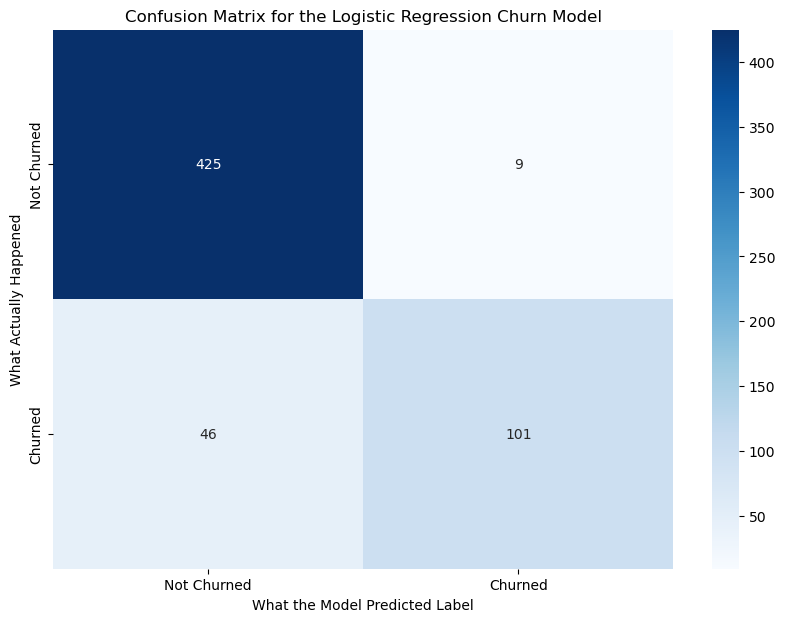

In [106]:
# Plot confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.title('Confusion Matrix for the Logistic Regression Churn Model')
plt.ylabel('What Actually Happened')
plt.xlabel('What the Model Predicted Label')
plt.show()


### Model prediction from another angle

In [107]:
display(cm)

cm[0,1]

# if the model predicts retension (no churn), what % of the time is it correct?
No_churn_predited_performance = cm[0,0]/(cm[0,0]+cm[1,0])*100
churn_predited_performance = cm[1,1]/(cm[0,1]+cm[1,1])*100
print(f'If the model predicts "No churn", it is correct {No_churn_predited_performance:.1f} % of the time')
print(f'If the model predicts "Churn",    it is correct {churn_predited_performance:.1f} % of the time')

array([[425,   9],
       [ 46, 101]], dtype=int64)

If the model predicts "No churn", it is correct 90.2 % of the time
If the model predicts "Churn",    it is correct 91.8 % of the time
